In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
df = pd.read_csv("Theoph.csv")
df.head()

,Unnamed: 0,Subject,Wt,Dose,Time,conc
0,1,1,79.6,4.02,0.00,0.74
1,2,1,79.6,4.02,0.25,2.84
2,3,1,79.6,4.02,0.57,6.57
3,4,1,79.6,4.02,1.12,10.50
4,5,1,79.6,4.02,2.02,9.66


In [7]:
df.describe()

,Unnamed: 0,Subject,Wt,Dose,Time,conc
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,6.500000,69.583333,4.625833,5.894621,4.960455
std,38.249183,3.465203,9.133181,0.718074,6.925952,2.867319
min,1.000000,1.000000,54.600000,3.100000,0.000000,0.000000
25%,33.750000,3.750000,63.575000,4.305000,0.595000,2.877500
50%,66.500000,6.500000,70.500000,4.530000,3.530000,5.275000
75%,99.250000,9.250000,74.425000,5.037500,9.000000,7.140000
max,132.000000,12.000000,86.400000,5.860000,24.650000,11.400000


In [13]:
grouped = df.groupby(df['Subject'])
df_person = grouped.get_group(1).iloc[:, 2:]
df_person

,Wt,Dose,Time,conc
0,79.6,4.02,0.00,0.74
1,79.6,4.02,0.25,2.84
2,79.6,4.02,0.57,6.57
3,79.6,4.02,1.12,10.50
4,79.6,4.02,2.02,9.66
5,79.6,4.02,3.82,8.58
6,79.6,4.02,5.10,8.36
7,79.6,4.02,7.03,7.47
8,79.6,4.02,9.05,6.89
9,79.6,4.02,12.12,5.94


In [14]:
x = np.array(df_person["Time"]).reshape(-1, 1)
y = np.array(df_person["conc"])

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test.reshape(-1, 1))

NameError: name 'b0' is not defined

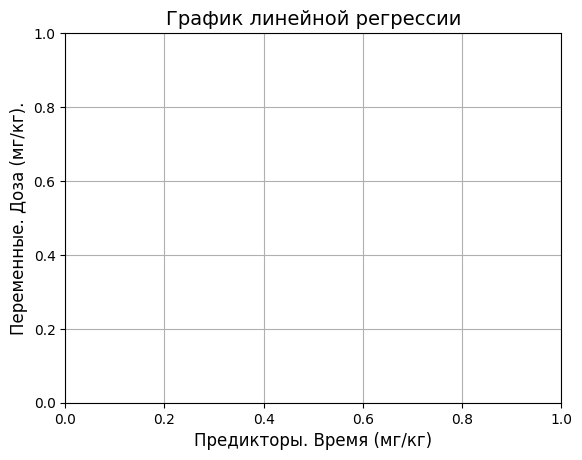

In [15]:
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
polynom = PolynomialFeatures(degree=3)
X_cubic = polynom.fit_transform(X_train)
X_fit = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
regr = regr.fit(X_cubic, y)
plt.title('График линейной регрессии', fontsize=14)
plt.xlabel('Предикторы. Время (мг/кг)', fontsize=12)
plt.ylabel('Переменные. Доза (мг/кг).', fontsize=12)
plt.grid()
plt.plot(x, b0 * x + b1, 'b')
plt.plot(maxs_df["Time"], maxs_df["Dose"], 'ko')
plt.plot(x, y_pred, 'ro', label='predict')
print(f'Coef k = {b0}\nCoef b = {b1}')

r2 = model.score(x, y)
print("RSQUARE: {}".format(r2))

from sklearn.metrics import mean_squared_error, mean_absolute_error 
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred))}")
print(f"MAE: {mean_absolute_error(y, y_pred)}")

РЕГУЛЯРИЗАЦИЯ

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()
# newaxis увеличивает размерность массива, flatten — наооборот
# https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.3, random_state=0)